# Understanding the Basic Steps of EDA

In this Study, we will be predicting the price of a house given it's features.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the Dataset

In [3]:
df = pd.read_csv('kc_house_data.csv')

## 2. Understanding the Data

In [4]:
df.shape

(21613, 21)

In [5]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

The number of bathrooms and floors contains decimals hence giving the idea that data is not having high level of Varacity.
But, for this we will use the feature as our focus is the EDA process.

In [6]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We can drop the id as it has no significant meaning in effecting the house price and also the date column as it 
is of Obeject type.

In [8]:
df = df.drop(['id','date'],axis=1)

In [9]:
df.shape

(21613, 19)

## 3. Missing Values

In [10]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values seems to exists in the dataset. If missing values were encountered we can,
1) Impute

2) Remove

## 4. Univariate Analysis for Response Variable 

### 4.1 Visualizing

In [11]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

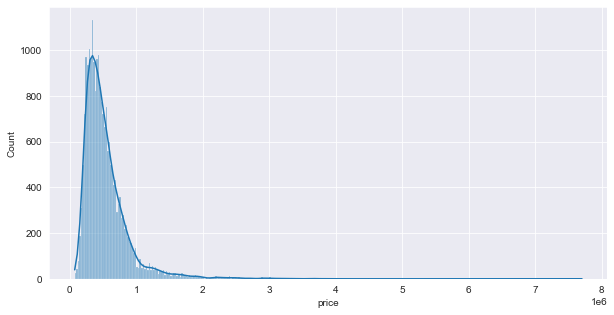

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['price'],kde=True)

We can observe the data is right skewed and possibly result of outliers. For further clarification of the outliers, we can use the boxplot.

<AxesSubplot:xlabel='price'>

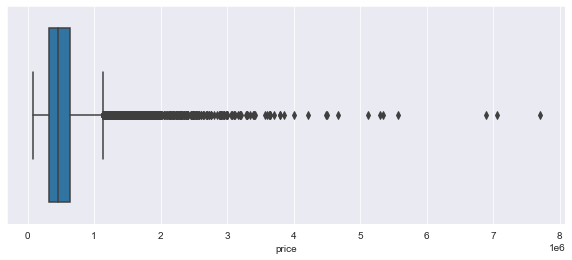

In [13]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x=df['price'])

### 4.2 Removing Outliers

Below methods can be used to remove outliers

1.Z-score treatment(When data is Normally distributed)

2.IQR based filtering (When data is Skewed)


In [14]:
# Finding the quartiles
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)
print(percentile25,percentile75)

321950.0 645000.0


In [15]:
#Finding the upper and Lower Limit
interQuartileRange = percentile75-percentile25
lowerLmt = percentile25 - 1.5*interQuartileRange
upperLmt = percentile75 + 1.5*interQuartileRange

In [16]:
#Dropping out of range values
df1 = df[(df['price']>lowerLmt)&(df['price']<upperLmt)]

In [17]:
#Checking the shape
df1.shape

(20467, 19)

<AxesSubplot:xlabel='price', ylabel='Count'>

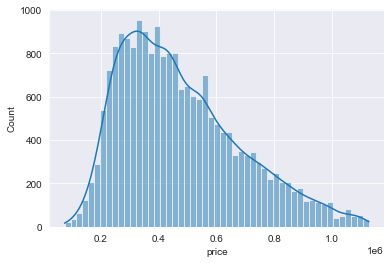

In [18]:
#Replotting the graphs
sns.histplot(data=df1,x=df1['price'],kde=True)

<AxesSubplot:xlabel='price'>

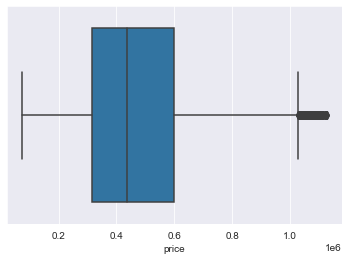

In [19]:
sns.boxplot(data=df1,x=df1['price'])

The number of outliers were significantly reduced

## 5. Multivariate Analysis for Predictor Variables

### 5.1 Understanding the Distribution of Features 

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

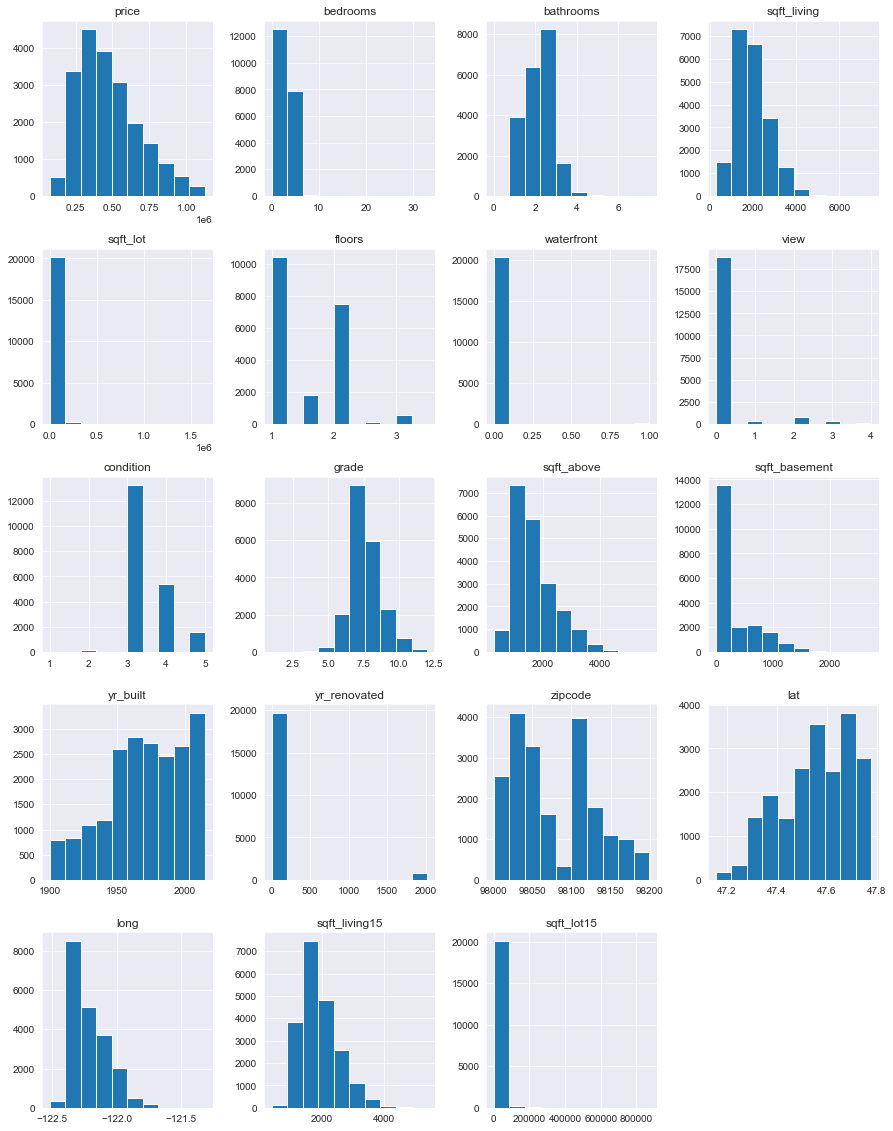

In [20]:
df1.hist(figsize=(15,20),bins=10)

It is observative that sqft_lot,waterfront,view,yr_renovated,sqft_lot15 features contain 0 for majority of the values hence we will remove these columns for more accurate predictions

In [21]:
df2 = df1.drop(['sqft_lot','waterfront','yr_renovated','sqft_lot15','view'],axis=1)

In [22]:
df2.shape

(20467, 14)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

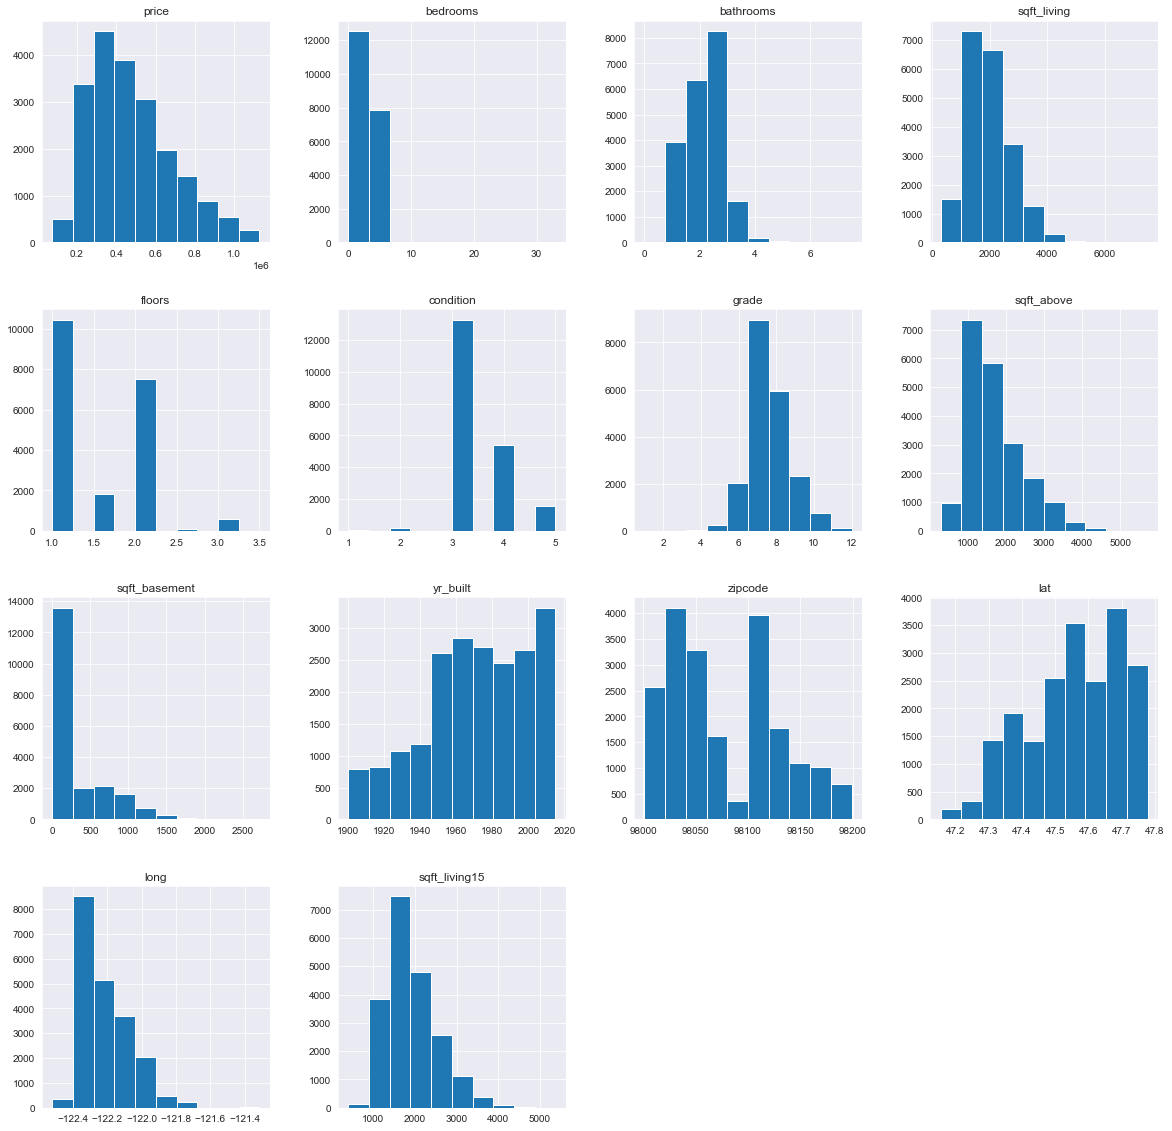

In [23]:
df2.hist(figsize=(20,20))

### 5.2 Understanding the Correlation of Features 

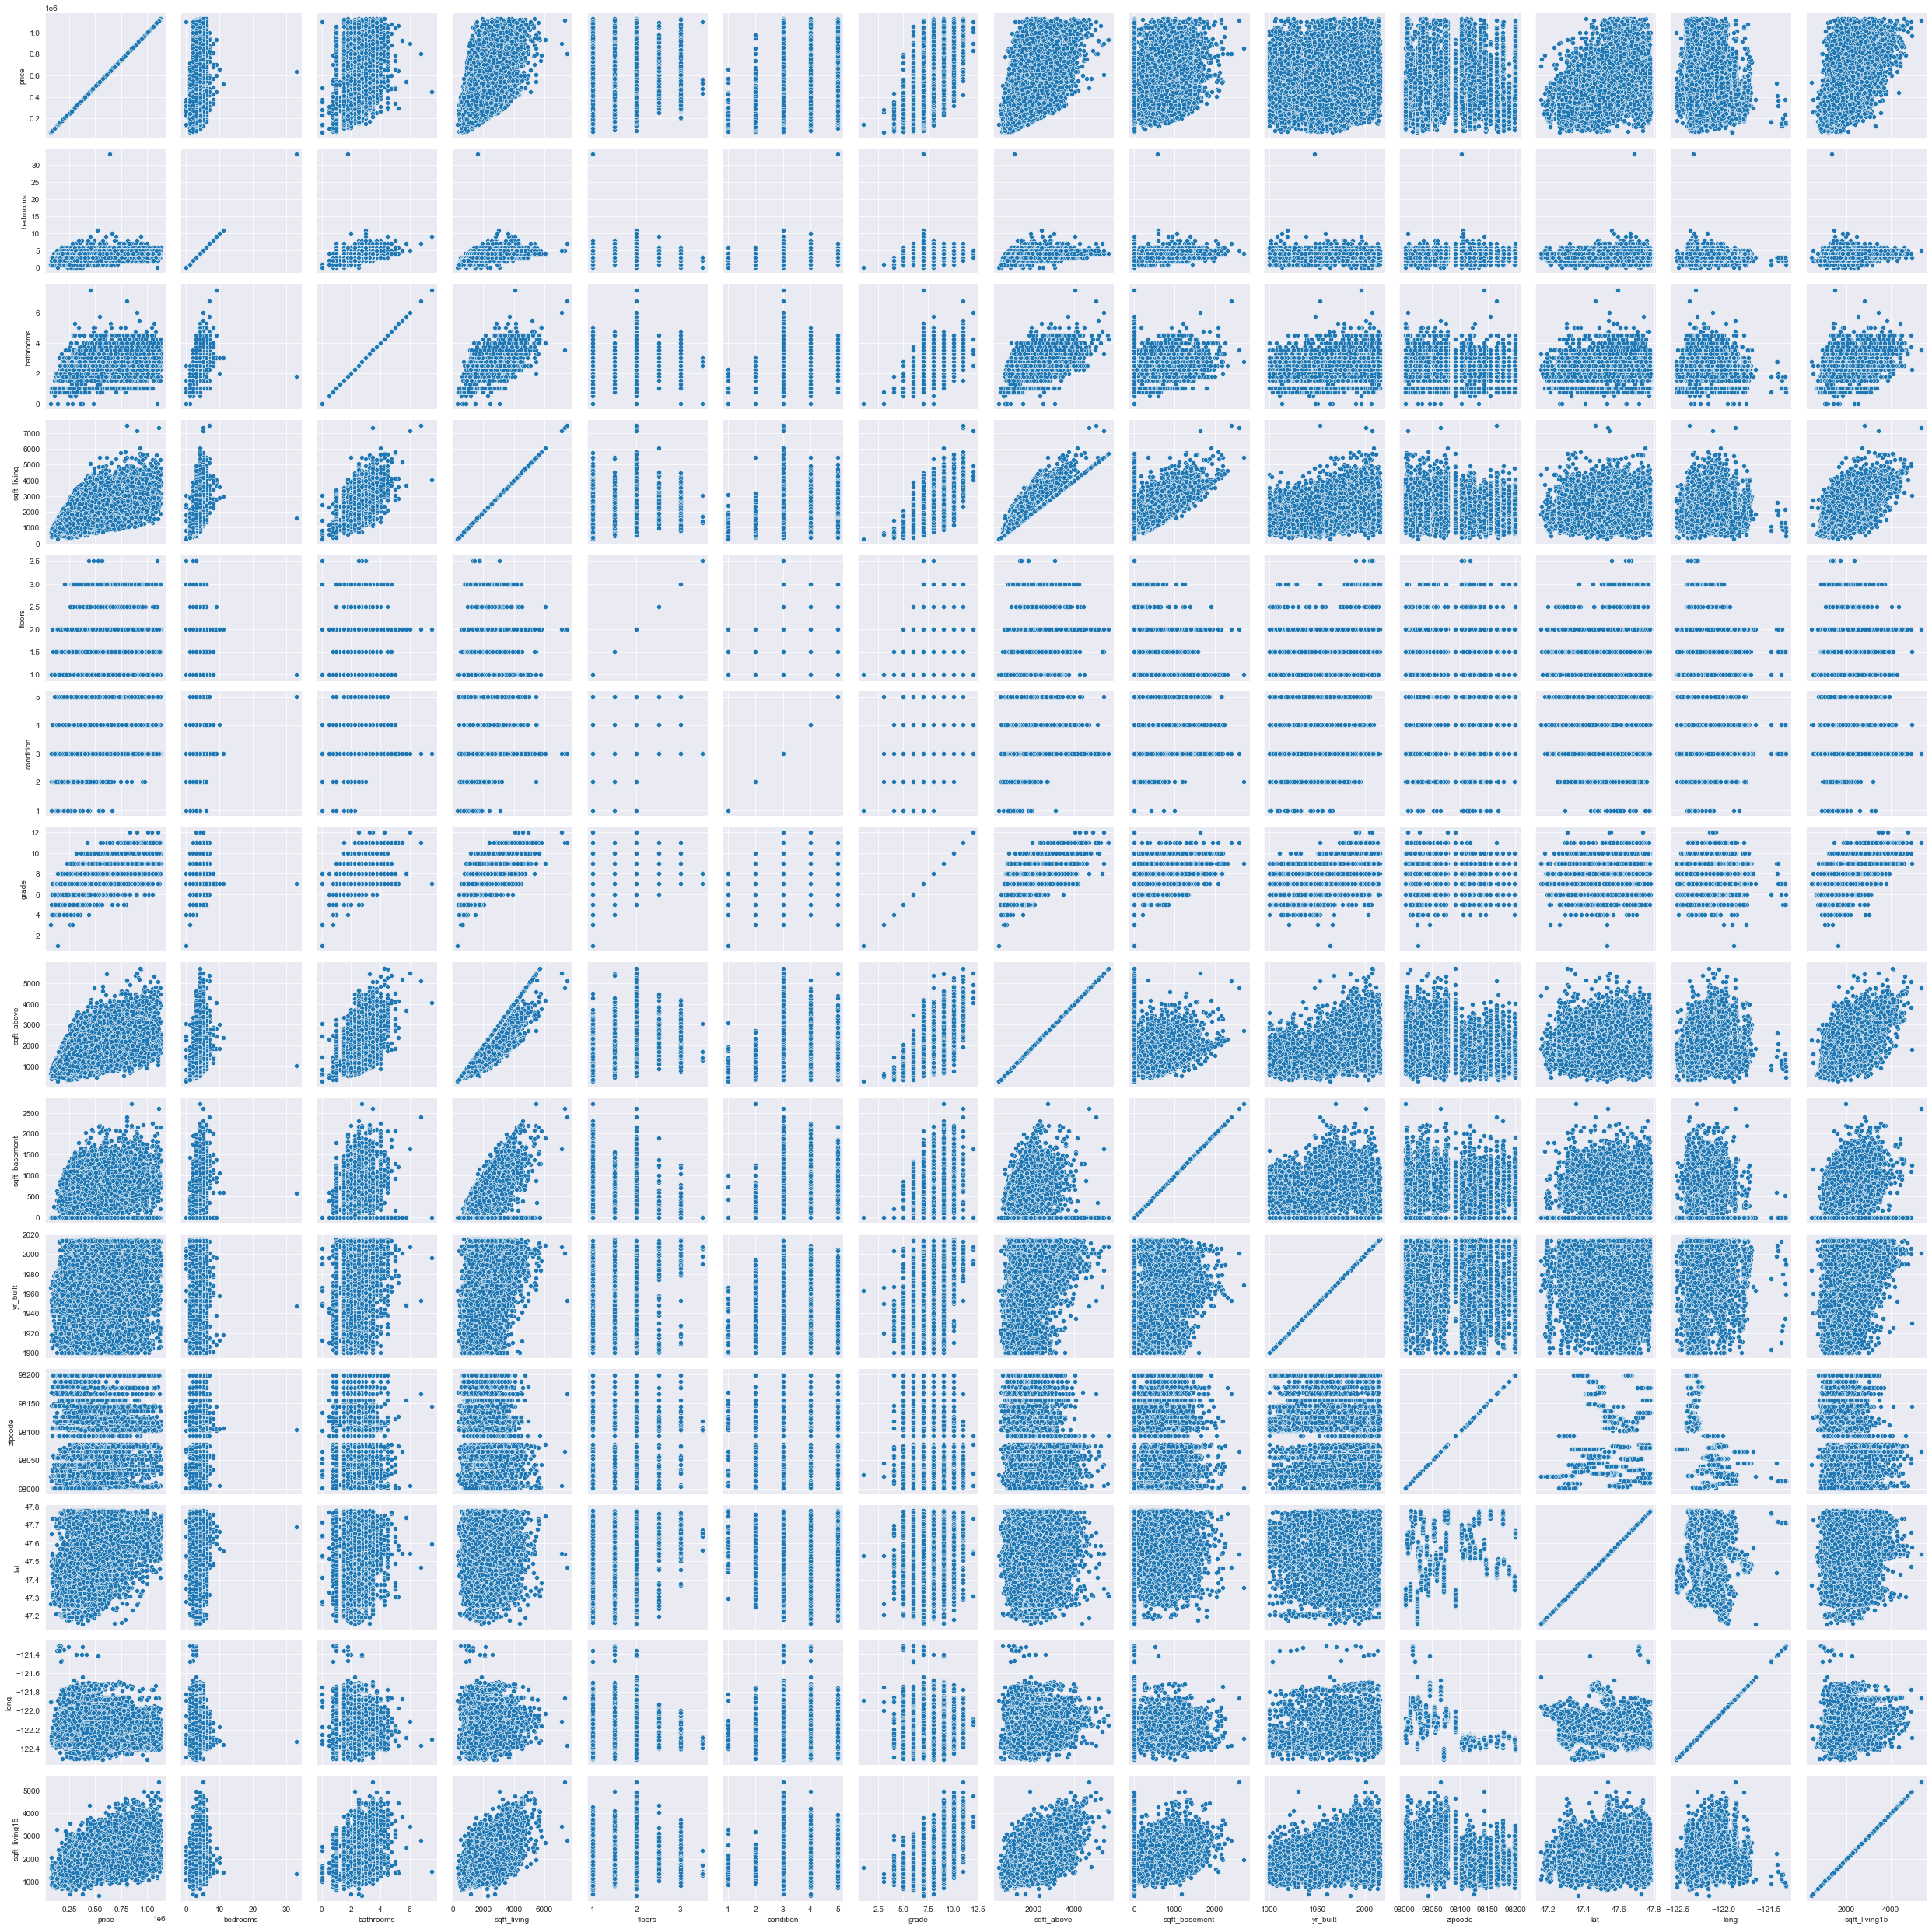

In [24]:
g = sns.PairGrid(df2)
g.map(sns.scatterplot)

<Figure size 1440x360 with 0 Axes>

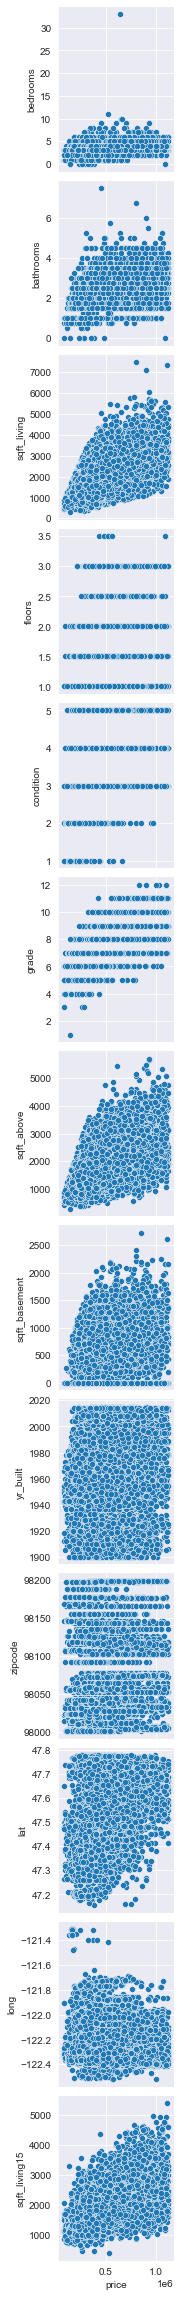

In [25]:
plt.figure(figsize=(20,5))
df3 = df2.drop(['price'],axis=1)
pp = sns.pairplot(data=df2,
                  x_vars=['price'],
                  y_vars=df3,)

We can observe that the square feet of the house have a strong linear relationship with the response variable. And some other features such as zip code does not show any relationship. To further understand, we will plot the heatmap.

In [26]:
df2 = df2.drop(['long','lat','zipcode'],axis = 1)

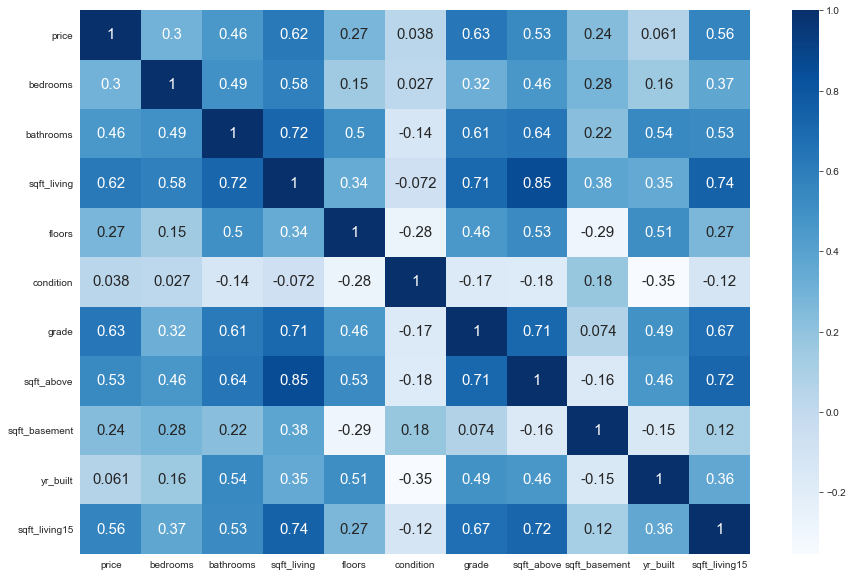

In [30]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df2.corr(), 
                 annot=True, 
                 annot_kws={'size':15}, 
                cmap='Blues')